In [1]:
import numpy as np
import csv
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
random.seed(42)
np.random.seed(42)

In [2]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

In [27]:
from sklearn import linear_model

# Dataset 2: Linear Regression

In [9]:
file_path= os.path.expanduser('~/EE219/hw4/housing_data.csv')
df=pd.read_csv(file_path, sep=',',header=None)

In [12]:
print("MEDV\n", df.loc[0,13])
df[13]

MEDV
 24.0


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 13, Length: 506, dtype: float64

In [13]:
df_y=df[13]
df=df.drop([13], axis = 1)

In [36]:
kf = KFold(n_splits=10,random_state=42,shuffle=True)
RMSE_train=[]
RMSE_test=[]
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
#     print(X_train)
#     print(y_train)
    reg = LinearRegression(normalize=True)
    reg.fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    RMSE_train.append(mean_squared_error(y_train, pred_train))
    RMSE_test.append(mean_squared_error(y_test, pred_test))
print('RMSE for train data=',mean(RMSE_train))
print('RMSE for test data=',mean(RMSE_test))

RMSE for train data= 21.81858699614402
RMSE for test data= 23.364203007530804


In [37]:
reg.coef_ 

array([-1.01889067e-01,  4.78657068e-02,  4.25242058e-02,  2.13065449e+00,
       -1.77470186e+01,  3.71996316e+00,  9.25223548e-03, -1.45616126e+00,
        2.91484760e-01, -1.27341960e-02, -9.58533414e-01,  9.34165225e-03,
       -5.67212111e-01])

In [ ]:
# 5th represent NOX: nitric oxides concentration (parts per 10 million)
# 7th represent AGE: proportion of owner-occupied units built prior to 1940

Text(0, 0.5, 'fitted valuse')

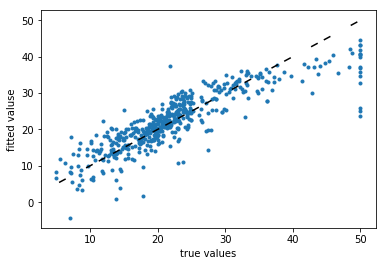

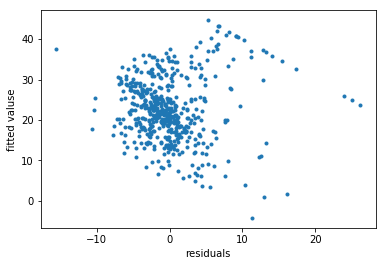

In [23]:
reg = LinearRegression().fit(df, df_y)
pred= reg.predict(df)
plt.figure()
plt.scatter(df_y, pred,marker='.')
plt.plot(df_y,df_y,dashes=[5, 25],color='black')
plt.xlabel('true values')
plt.ylabel('fitted valuse')


plt.figure()
plt.scatter(df_y-pred, pred,marker='.')
plt.xlabel('residuals')
plt.ylabel('fitted valuse')

# Overfitting and Regularization

In [33]:
#Ridge regularizer
alphas=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
kf = KFold(n_splits=10,random_state=42,shuffle=True)
avg_RMSE_train=[]
avg_RMSE_test=[]
for alpha_value in alphas:
    RMSE_train=[]
    RMSE_test=[]
    for train_index, test_index in kf.split(df):
        X_train= df.loc[train_index]
        y_train= df_y.loc[train_index]
        X_test= df.loc[test_index]
        y_test= df_y.loc[test_index]
        reg = linear_model.Ridge(alpha=alpha_value)
        reg.fit(X_train, y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        RMSE_train.append(mean_squared_error(y_train, pred_train))
        RMSE_test.append(mean_squared_error(y_test, pred_test))
    print('alpha=',alpha_value)
    print('RMSE for train data=',mean(RMSE_train))
    print('RMSE for test data=',mean(RMSE_test))
    avg_RMSE_train.append(mean(RMSE_train))
    avg_RMSE_test.append(mean(RMSE_test))

alpha= 0.001
RMSE for train data= 21.818587497291855
RMSE for test data= 23.364223128353398
alpha= 0.003
RMSE for train data= 21.818591493459593
RMSE for test data= 23.364266513525106
alpha= 0.01
RMSE for train data= 21.81863646509152
RMSE for test data= 23.364450880307654
alpha= 0.03
RMSE for train data= 21.81901969648912
RMSE for test data= 23.36524462738946
alpha= 0.1
RMSE for train data= 21.822951526043468
RMSE for test data= 23.370725130667324
alpha= 0.3
RMSE for train data= 21.849090125160053
RMSE for test data= 23.401694243196033
alpha= 0.5
RMSE for train data= 21.886295404171427
RMSE for test data= 23.443598978176503
alpha= 1
RMSE for train data= 21.987909862481366
RMSE for test data= 23.554530509948624
alpha= 3
RMSE for train data= 22.2731334344439
RMSE for test data= 23.85029384523629
alpha= 5
RMSE for train data= 22.421570633925707
RMSE for test data= 23.99243239767289
alpha= 10
RMSE for train data= 22.609088327777137
RMSE for test data= 24.15116702880632
alpha= 30
RMSE for 

In [41]:
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = linear_model.Ridge(alpha=0.001)
    reg.fit(X_train, y_train)
reg.coef_ 

array([-1.01884964e-01,  4.78679848e-02,  4.24738809e-02,  2.13043466e+00,
       -1.77339019e+01,  3.72007811e+00,  9.24143524e-03, -1.45595928e+00,
        2.91458778e-01, -1.27352894e-02, -9.58388385e-01,  9.34247056e-03,
       -5.67228569e-01])

In [34]:
#Lasso regularizer
alphas=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
kf = KFold(n_splits=10,random_state=42,shuffle=True)
avg_RMSE_train=[]
avg_RMSE_test=[]
for alpha_value in alphas:
    RMSE_train=[]
    RMSE_test=[]
    for train_index, test_index in kf.split(df):
        X_train= df.loc[train_index]
        y_train= df_y.loc[train_index]
        X_test= df.loc[test_index]
        y_test= df_y.loc[test_index]
        reg = linear_model.Lasso(alpha=alpha_value)
        reg.fit(X_train, y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        RMSE_train.append(mean_squared_error(y_train, pred_train))
        RMSE_test.append(mean_squared_error(y_test, pred_test))
    print('alpha=',alpha_value)
    print('RMSE for train data=',mean(RMSE_train))
    print('RMSE for test data=',mean(RMSE_test))
    avg_RMSE_train.append(mean(RMSE_train))
    avg_RMSE_test.append(mean(RMSE_test))

alpha= 0.001
RMSE for train data= 21.81895381415829
RMSE for test data= 23.365697443492664
alpha= 0.003
RMSE for train data= 21.821886977522997
RMSE for test data= 23.37103444068393
alpha= 0.01
RMSE for train data= 21.855142830749628
RMSE for test data= 23.41342612922379
alpha= 0.03
RMSE for train data= 22.144839369404384
RMSE for test data= 23.748717026431407
alpha= 0.1
RMSE for train data= 22.96678583835491
RMSE for test data= 24.59809089527095
alpha= 0.3
RMSE for train data= 23.50489461097781
RMSE for test data= 24.947643288157966
alpha= 0.5
RMSE for train data= 24.072875817859245
RMSE for test data= 25.507898484899734
alpha= 1
RMSE for train data= 26.73400578805305
RMSE for test data= 28.235449776422662
alpha= 3
RMSE for train data= 34.045220610754996
RMSE for test data= 35.25115534712926
alpha= 5
RMSE for train data= 36.88954786458127
RMSE for test data= 37.80712132535779
alpha= 10
RMSE for train data= 40.183031545225745
RMSE for test data= 40.985918459533835
alpha= 30
RMSE for tr

In [42]:
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = linear_model.Lasso(alpha=0.001)
    reg.fit(X_train, y_train)
reg.coef_ 

array([-1.01769102e-01,  4.79198219e-02,  4.12143925e-02,  2.11097153e+00,
       -1.73990558e+01,  3.72102301e+00,  9.00722224e-03, -1.45045949e+00,
        2.90833162e-01, -1.27665242e-02, -9.54799753e-01,  9.36338781e-03,
       -5.67816353e-01])

In [35]:
#Elastic Net regularizer
alphas=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
l1_ratio=[0.001,0.003,0.01,0.03,0.1,0.3,0.5,1,3,5,10,30,50,100]
kf = KFold(n_splits=10,random_state=42,shuffle=True)
avg_RMSE_train=[]
avg_RMSE_test=[]
for alpha_value in alphas:
    for l1_ratio_value in l1_ratio:
        RMSE_train=[]
        RMSE_test=[]
        for train_index, test_index in kf.split(df):
            X_train= df.loc[train_index]
            y_train= df_y.loc[train_index]
            X_test= df.loc[test_index]
            y_test= df_y.loc[test_index]
            reg = linear_model.ElasticNet(alpha=alpha_value,l1_ratio=l1_ratio_value)
            reg.fit(X_train, y_train)
            pred_train = reg.predict(X_train)
            pred_test = reg.predict(X_test)
            RMSE_train.append(mean_squared_error(y_train, pred_train))
            RMSE_test.append(mean_squared_error(y_test, pred_test))
        print('alpha=',alpha_value,'l1_ratio=',l1_ratio_value)
        print('RMSE for train data=',mean(RMSE_train))
        print('RMSE for test data=',mean(RMSE_test))
        avg_RMSE_train.append(mean(RMSE_train))
        avg_RMSE_test.append(mean(RMSE_test))

alpha= 0.001 l1_ratio= 0.001
RMSE for train data= 21.877426414613243
RMSE for test data= 23.43371114734082
alpha= 0.001 l1_ratio= 0.003
RMSE for train data= 21.877262838954806
RMSE for test data= 23.433528858151362
alpha= 0.001 l1_ratio= 0.01
RMSE for train data= 21.87669084798041
RMSE for test data= 23.432891307146438
alpha= 0.001 l1_ratio= 0.03
RMSE for train data= 21.875061211564994
RMSE for test data= 23.431073720977626
alpha= 0.001 l1_ratio= 0.1
RMSE for train data= 21.869417339510246
RMSE for test data= 23.424765034198813
alpha= 0.001 l1_ratio= 0.3
RMSE for train data= 21.853980026460565
RMSE for test data= 23.407377665127292
alpha= 0.001 l1_ratio= 0.5
RMSE for train data= 21.840077241334946
RMSE for test data= 23.39149135882763
alpha= 0.001 l1_ratio= 1
RMSE for train data= 21.81895381415829
RMSE for test data= 23.365697443492664
alpha= 0.001 l1_ratio= 3
RMSE for train data= 24.852174583385743
RMSE for test data= 26.763405793579427
alpha= 0.001 l1_ratio= 5
RMSE for train data= 1.

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.001 l1_ratio= 50
RMSE for train data= 26.07568598911324
RMSE for test data= 29.324903246212198
alpha= 0.001 l1_ratio= 100
RMSE for train data= 24.70871924869295
RMSE for test data= 26.398283831900514
alpha= 0.003 l1_ratio= 0.001
RMSE for train data= 22.05613162652914
RMSE for test data= 23.62730206727885
alpha= 0.003 l1_ratio= 0.003
RMSE for train data= 22.05570644059056
RMSE for test data= 23.62685413840182


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.003 l1_ratio= 0.01
RMSE for train data= 22.054214682859385
RMSE for test data= 23.62528220511273
alpha= 0.003 l1_ratio= 0.03
RMSE for train data= 22.049921507193005
RMSE for test data= 23.620755005095816
alpha= 0.003 l1_ratio= 0.1
RMSE for train data= 22.03453136720349
RMSE for test data= 23.60448614520243
alpha= 0.003 l1_ratio= 0.3
RMSE for train data= 21.987460206899467
RMSE for test data= 23.554258784147205
alpha= 0.003 l1_ratio= 0.5
RMSE for train data= 21.9362724383258
RMSE for test data= 23.499001107734934
alpha= 0.003 l1_ratio= 1
RMSE for train data= 21.821886977522997
RMSE for test data= 23.37103444068393
alpha= 0.003 l1_ratio= 3
RMSE for train data= inf
RMSE for test data= inf
alpha= 0.003 l1_ratio= 5
RMSE for train data= 84.40788008706085
RMSE for test data= 84.65613238847187


F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors =

alpha= 0.003 l1_ratio= 10
RMSE for train data= 23.002219257491213
RMSE for test data= 24.90584502509555
alpha= 0.003 l1_ratio= 30
RMSE for train data= 24.911973760285267
RMSE for test data= 26.292532599310974
alpha= 0.003 l1_ratio= 50
RMSE for train data= 27.88507473405429
RMSE for test data= 31.316493224887434


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha= 0.003 l1_ratio= 100
RMSE for train data= 1.9346373205765305e+191
RMSE for test data= 3.4473847270137804e+191
alpha= 0.01 l1_ratio= 0.001
RMSE for train data= 22.394776663338757
RMSE for test data= 23.967751082216246
alpha= 0.01 l1_ratio= 0.003
RMSE for train data= 22.394348740116033
RMSE for test data= 23.967371607404562
alpha= 0.01 l1_ratio= 0.01
RMSE for train data= 22.392842690924592
RMSE for test data= 23.966034545962984
alpha= 0.01 l1_ratio= 0.03
RMSE for train data= 22.38846698713817
RMSE for test data= 23.962136856088126
alpha= 0.01 l1_ratio= 0.1
RMSE for train data= 22.372243918455474
RMSE for test data= 23.947525577814115
alpha= 0.01 l1_ratio= 0.3
RMSE for train data= 22.316205672425994
RMSE for test data= 23.895366502143318
alpha= 0.01 l1_ratio= 0.5
RMSE for train data= 22.239176106785
RMSE for test data= 23.820217761224843
alpha= 0.01 l1_ratio= 1
RMSE for train data= 21.855142830749628
RMSE for test data= 23.41342612922379


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.01 l1_ratio= 3
RMSE for train data= 23.290661540978032
RMSE for test data= 25.103755353781104
alpha= 0.01 l1_ratio= 5
RMSE for train data= 23.292423124147756
RMSE for test data= 25.483912628458373
alpha= 0.01 l1_ratio= 10
RMSE for train data= 24.637848530129133
RMSE for test data= 26.107832294847583


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.01 l1_ratio= 30
RMSE for train data= 1.4051439637110463e+168
RMSE for test data= 2.5350681233996697e+168
alpha= 0.01 l1_ratio= 50
RMSE for train data= 84.40788008706085
RMSE for test data= 84.65613238847187
alpha= 0.01 l1_ratio= 100
RMSE for train data= 31.029927608199987
RMSE for test data= 33.82608046759411
alpha= 0.03 l1_ratio= 0.001
RMSE for train data= 22.69330934382659
RMSE for test data= 24.214487996502818


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha= 0.03 l1_ratio= 0.003
RMSE for train data= 22.693033862329717
RMSE for test data= 24.214374259006274
alpha= 0.03 l1_ratio= 0.01
RMSE for train data= 22.692067188544858
RMSE for test data= 24.213974945015366
alpha= 0.03 l1_ratio= 0.03
RMSE for train data= 22.689283290445903
RMSE for test data= 24.212822538273834
alpha= 0.03 l1_ratio= 0.1
RMSE for train data= 22.679254956068316
RMSE for test data= 24.2086273541766
alpha= 0.03 l1_ratio= 0.3
RMSE for train data= 22.64716995686828
RMSE for test data= 24.194316681756433
alpha= 0.03 l1_ratio= 0.5
RMSE for train data= 22.60565885838954
RMSE for test data= 24.17231023297847
alpha= 0.03 l1_ratio= 1
RMSE for train data= 22.144839369404384
RMSE for test data= 23.748717026431407
alpha= 0.03 l1_ratio= 3
RMSE for train data= 3.698067168100198e+140
RMSE for test data= 4.416053962813299e+140
alpha= 0.03 l1_ratio= 5
RMSE for train data= 24.97225441954916
RMSE for test data= 27.231001776687446


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.03 l1_ratio= 10
RMSE for train data= 1.7251391628538464e+107
RMSE for test data= 3.2253627539522156e+107
alpha= 0.03 l1_ratio= 30
RMSE for train data= 28.758110165247587
RMSE for test data= 30.614781089389147
alpha= 0.03 l1_ratio= 50
RMSE for train data= 1.9836569248791846e+124
RMSE for test data= 2.9993445406543165e+124
alpha= 0.03 l1_ratio= 100
RMSE for train data= 43.36424338599116
RMSE for test data= 47.147551371540445


F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha= 0.1 l1_ratio= 0.001
RMSE for train data= 23.184764617363758
RMSE for test data= 24.593564560552316
alpha= 0.1 l1_ratio= 0.003
RMSE for train data= 23.18424013198371
RMSE for test data= 24.59325355889754
alpha= 0.1 l1_ratio= 0.01
RMSE for train data= 23.182407243164736
RMSE for test data= 24.592171781100383
alpha= 0.1 l1_ratio= 0.03
RMSE for train data= 23.177195278368952
RMSE for test data= 24.589137350798946
alpha= 0.1 l1_ratio= 0.1
RMSE for train data= 23.159289653123682
RMSE for test data= 24.579263419764096
alpha= 0.1 l1_ratio= 0.3
RMSE for train data= 23.112700439948632
RMSE for test data= 24.5597869446019
alpha= 0.1 l1_ratio= 0.5
RMSE for train data= 23.079556205752016
RMSE for test data= 24.56183432314599
alpha= 0.1 l1_ratio= 1
RMSE for train data= 22.96678583835491
RMSE for test data= 24.59809089527095
alpha= 0.1 l1_ratio= 3
RMSE for train data= 50.06988968109665
RMSE for test data= 64.24449964081674


F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
F:\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:241: RuntimeWarning: overflow encountered in square
  output_errors =

alpha= 0.1 l1_ratio= 5
RMSE for train data= inf
RMSE for test data= inf
alpha= 0.1 l1_ratio= 10
RMSE for train data= 28.333448600960278
RMSE for test data= 30.158138861542263
alpha= 0.1 l1_ratio= 30
RMSE for train data= 34.47278546695277
RMSE for test data= 36.66161384638461
alpha= 0.1 l1_ratio= 50
RMSE for train data= 35.89785669898137
RMSE for test data= 36.876150447694336
alpha= 0.1 l1_ratio= 100
RMSE for train data= 36.58051456404374
RMSE for test data= 37.620824071476704
alpha= 0.3 l1_ratio= 0.001
RMSE for train data= 24.23829023460825
RMSE for test data= 25.56422345817571
alpha= 0.3 l1_ratio= 0.003
RMSE for train data= 24.237548485141556
RMSE for test data= 25.563659351007594
alpha= 0.3 l1_ratio= 0.01
RMSE for train data= 24.234950345229425
RMSE for test data= 25.561686613917775
alpha= 0.3 l1_ratio= 0.03
RMSE for train data= 24.22751295665704
RMSE for test data= 25.55606695923694
alpha= 0.3 l1_ratio= 0.1
RMSE for train data= 24.201378940220966
RMSE for test data= 25.5367280655773

F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

alpha= 0.3 l1_ratio= 3
RMSE for train data= 30.02969471993306
RMSE for test data= 31.709183792069478
alpha= 0.3 l1_ratio= 5
RMSE for train data= 5.702728494323389e+24
RMSE for test data= 8.703632732441392e+24
alpha= 0.3 l1_ratio= 10
RMSE for train data= 31.313483865711635
RMSE for test data= 32.71596901471026
alpha= 0.3 l1_ratio= 30
RMSE for train data= 36.43039944218256
RMSE for test data= 37.44951519574021
alpha= 0.3 l1_ratio= 50
RMSE for train data= 37.86119920932926
RMSE for test data= 38.67435501640105
alpha= 0.3 l1_ratio= 100
RMSE for train data= 56.78368813190803
RMSE for test data= 58.940757429768176
alpha= 0.5 l1_ratio= 0.001
RMSE for train data= 24.979108415647215
RMSE for test data= 26.283581214748907
alpha= 0.5 l1_ratio= 0.003
RMSE for train data= 24.978803897895993
RMSE for test data= 26.283485230715836
alpha= 0.5 l1_ratio= 0.01
RMSE for train data= 24.977740435775484
RMSE for test data= 26.28315699801051
alpha= 0.5 l1_ratio= 0.03
RMSE for train data= 24.974724294631162
RM

alpha= 30 l1_ratio= 0.5
RMSE for train data= 47.80462633723027
RMSE for test data= 48.651307765393426
alpha= 30 l1_ratio= 1
RMSE for train data= 61.38175741909193
RMSE for test data= 62.39316441886996
alpha= 30 l1_ratio= 3
RMSE for train data= 65.16212338919561
RMSE for test data= 65.76876529866388
alpha= 30 l1_ratio= 5
RMSE for train data= 66.62828090375957
RMSE for test data= 67.17255089257151
alpha= 30 l1_ratio= 10
RMSE for train data= 68.94974500035565
RMSE for test data= 69.49218739951016
alpha= 30 l1_ratio= 30
RMSE for train data= 84.40788008706085
RMSE for test data= 84.65613238847187
alpha= 30 l1_ratio= 50
RMSE for train data= 84.40788008706085
RMSE for test data= 84.65613238847187
alpha= 30 l1_ratio= 100
RMSE for train data= 84.40788008706085
RMSE for test data= 84.65613238847187
alpha= 50 l1_ratio= 0.001
RMSE for train data= 43.706373273083635
RMSE for test data= 44.770102620118884
alpha= 50 l1_ratio= 0.003
RMSE for train data= 43.78654318767443
RMSE for test data= 44.8524381

In [40]:
#best model  alpha= 0.001 l1_ratio= 1
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = linear_model.ElasticNet(alpha=0.001,l1_ratio=1)
    reg.fit(X_train, y_train)
reg.coef_ 

array([-1.01769102e-01,  4.79198219e-02,  4.12143925e-02,  2.11097153e+00,
       -1.73990558e+01,  3.72102301e+00,  9.00722224e-03, -1.45045949e+00,
        2.90833162e-01, -1.27665242e-02, -9.54799753e-01,  9.36338781e-03,
       -5.67816353e-01])